In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [100]:
# dv / dt (or u'') equation 
def a(u, t):
    return -u - math.cos(math.pi*t**2)*(4*math.pi**2*t**2-1) - 2*math.pi*math.sin(math.pi*t**2)

In [101]:
# First Order ODEs:
    # du/dt = v
    # dv/dt = -u + cos(pi*t^2)*(4*pi^2*t^2 - 1) - 2*pi*sin(pi*t^2)


k = 4                                           # number of periods
dt_list = [.025, .0125, .00625, .003125]        # time differentials
    
u = []        # positions
v = []        # velocities
tspan = []    # time steps


# iterate through the time intervals
for dt in dt_list:

    num_entries = int(k/dt+1)
    
    temp_u = np.empty(num_entries) # positions
    temp_v = np.empty(num_entries) # velocities
    
    # initial conditions
    t = 0
    temp_u[0] = 1
    temp_v[0] = 0
    
    # Leapfrog algorithm at each time step
    for i in range(0, int(k/dt)):
        t = t + dt
        a1 = a(temp_u[i], t)
        temp_u[i + 1] = temp_u[i] + dt*temp_v[i] + (1/2)*a1*dt**2
        a2 = a(temp_u[i + 1], t + dt)
        temp_v[i + 1] = temp_v[i] + (1/2)*(a1 + a2)*dt
        
    # t-range for plot    
    temp_tspan = np.arange(0, k + dt, dt)
    
    tspan.append(temp_tspan)
    u.append(temp_u)
    v.append(temp_v)

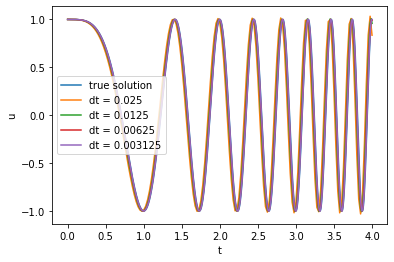

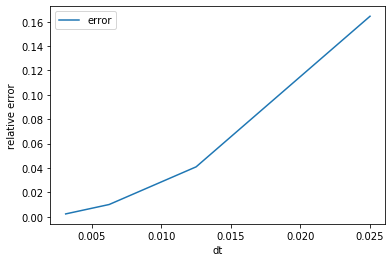

In [106]:
x = np.arange(0,4,0.001)
true_u = np.cos(math.pi*x**2)
plt.plot(x, true_u, label = 'true solution')

actual = true_u[-1]
err = []

# plot all lines
for i in range (len(dt_list)):
    line_label = "dt = " + str(dt_list[i])
    plt.plot(tspan[i], u[i], label = line_label)
    
    # calculate error of last element (@t = 4) based on true solution
    err.append(abs((u[i][-1] - actual) / actual))

plt.figure(1)
plt.legend()
plt.xlabel('t')
plt.ylabel('u')
plt.show()

plt.figure(2)
plt.plot(dt_list, err, label = 'error')
plt.xlabel('dt')
plt.ylabel('relative error')
plt.legend()
plt.show()